# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'StudentID': np.arange(1, 11),
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

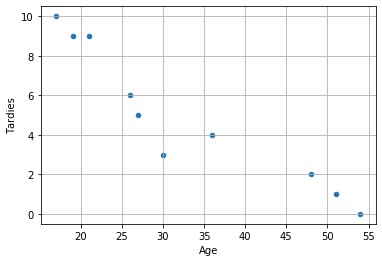

In [3]:
student_data.plot(kind='scatter', x='Age', y='Tardies')

plt.grid()
plt.show()

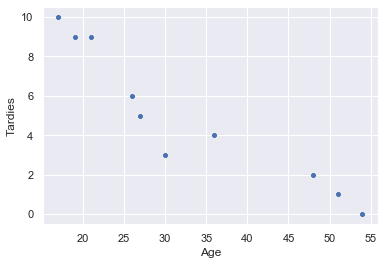

In [4]:
sns.set()
sns.scatterplot(x='Age', y='Tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

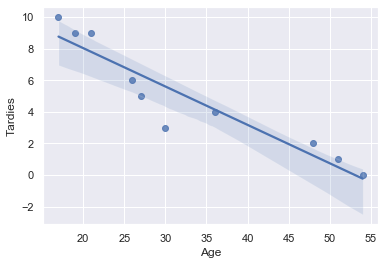

In [5]:
sns.regplot(x='Age', y='Tardies', data=student_data)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [7]:
student_data.cov()

,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = student_data[['Age']]
y = student_data['Tardies']
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = model.predict(X)
y_pred

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

Plot your regression model on your scatter plot.

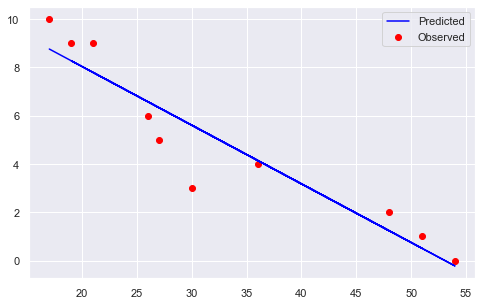

In [10]:
fig = plt.figure(figsize=(8, 5))

plt.scatter(X, y, color='red', label='Observed')
plt.plot(X, y_pred, color='blue', label='Predicted')

plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the `vehicles.csv` data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
vehicles= pd.read_csv('./data/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [14]:
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [15]:
cols = ['Year', 
        'Cylinders', 
        'Fuel Barrels/Year', 
        'Combined MPG', 
        'Fuel Cost/Year',
        'CO2 Emission Grams/Mile']

In [16]:
df_car = vehicles[cols]
df_car

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [34]:
df_car.dtypes

Year                         int64
Cylinders                  float64
Fuel Barrels/Year          float64
Combined MPG                 int64
Fuel Cost/Year               int64
CO2 Emission Grams/Mile    float64
dtype: object

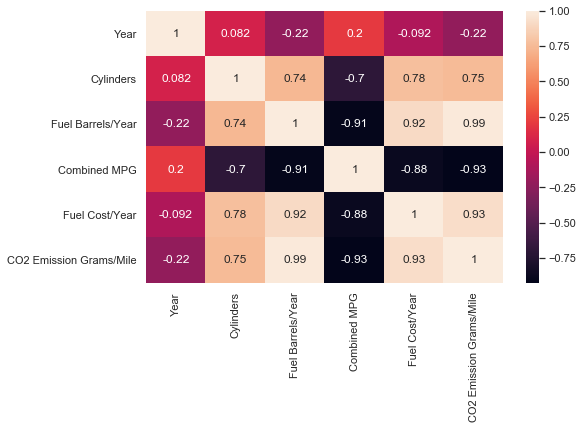

In [17]:
plt.figure(figsize=(8,5))

sns.heatmap(df_car.corr(), annot=True)

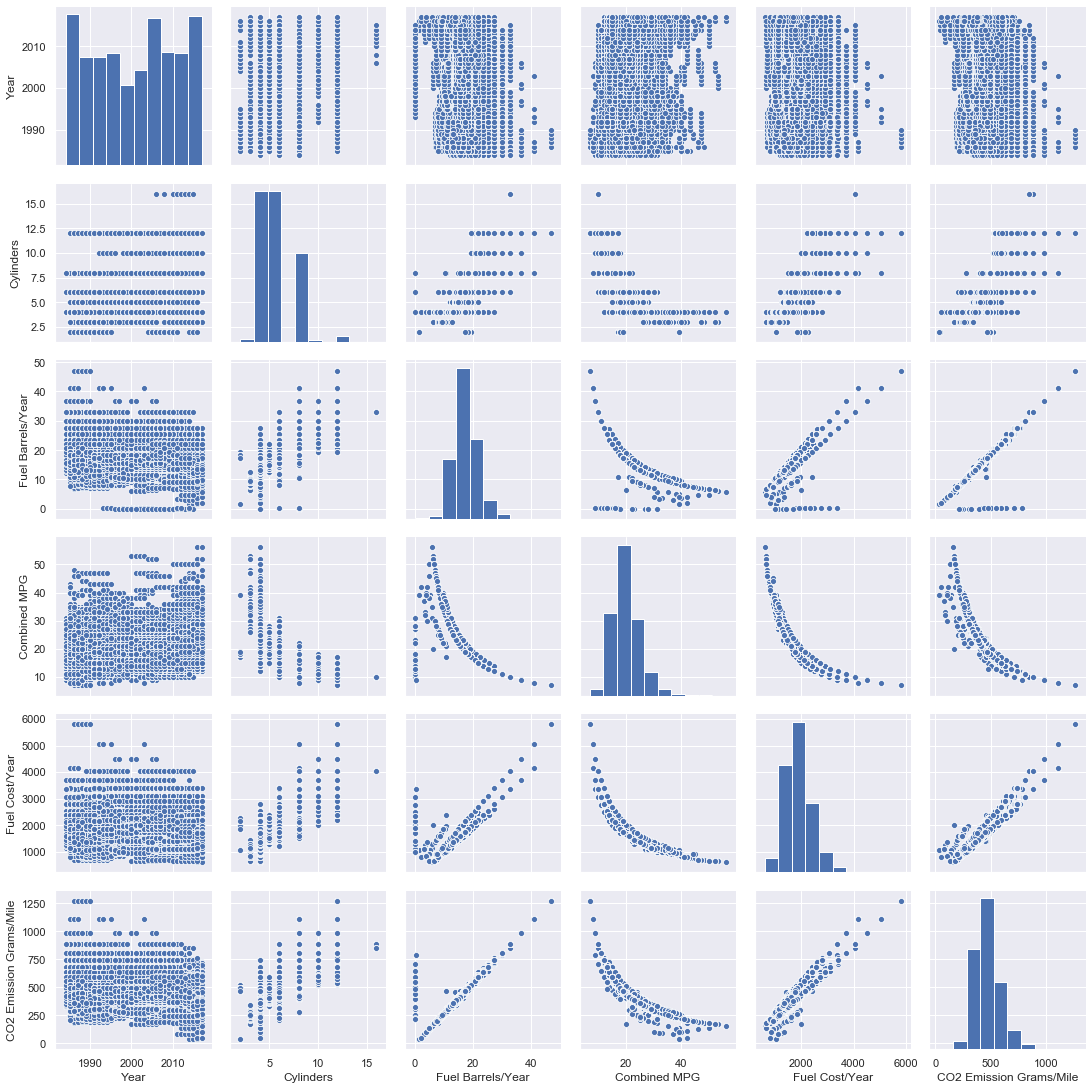

In [19]:
sns.pairplot(df_car)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
X = df_car[['Year',
            'Cylinders',
            'Fuel Barrels/Year',
            'Combined MPG',
            'Fuel Cost/Year']]

y = df_car['CO2 Emission Grams/Mile']

In [21]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred

array([522.03038361, 671.00105318, 552.68495072, ..., 230.01342446,
       229.69280773, 239.33283552])

In [22]:
# Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year

print(model.coef_)
print(model.intercept_)

[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
769.8882836464959


---

In [23]:
# Standardization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [24]:
model=LinearRegression()
model.fit(X_std,y)
y_pred_std= model.predict(X_std)

In [25]:
# Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year

print(model.coef_)
print(model.intercept_)

[ -3.2334676    3.29775166  85.11361853 -15.54354881  16.3793413 ]
475.3163392572124


---

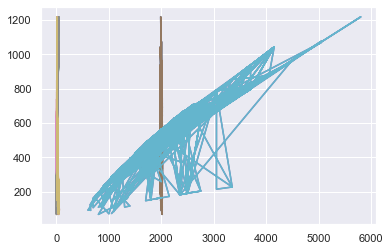

In [26]:
plt.plot(X, y_pred)
plt.plot(X, y_pred_std)

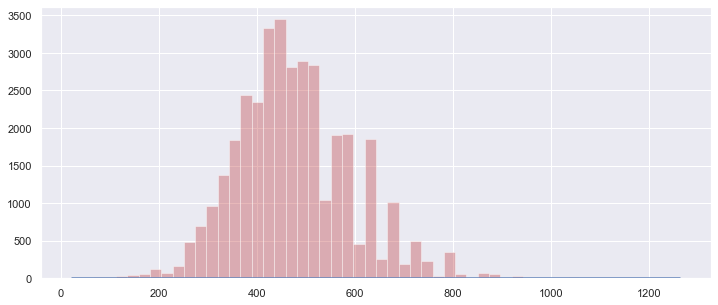

In [27]:
plt.figure(figsize=(12,5))

# without Standarization
#plt.subplot(1,2,1)
#sns.distplot(y, =True, color="r", label="Actual Value")
sns.distplot(y_pred, kde=True, color="b", label="Predicted_Values")

# with Standarization
#plt.subplot(1,2,2)
#sns.distplot(y, hist=True, color="r", label="Actual Value")
sns.distplot(y_pred_std, kde=False, color="r", label="Predicted_Values")


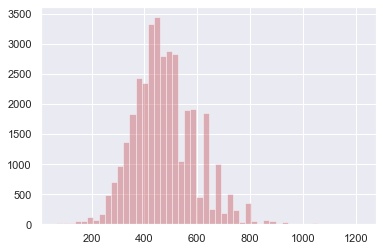

In [28]:
# with Standarization
#plt.subplot(1,2,2)
#sns.distplot(y, hist=True, color="r", label="Actual Value")
sns.distplot(y_pred_std, kde=False, color="r", label="Predicted_Values")

In [29]:
(y_pred_std - y_pred).min()

-9.777068044058979e-12

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print("Without Standardization")
print("MSE: ", mean_squared_error(y, y_pred))
print("Score: ", r2_score(y, y_pred))
print('------------------')
print("Standardization")
print("MSE: ", mean_squared_error(y, y_pred_std))
print("Score: ", r2_score(y, y_pred_std))


Without Standardization
MSE:  271.11965507029964
Score:  0.9808734920269122
------------------
Standardization
MSE:  271.11965507029964
Score:  0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [31]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
df = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14],
                   'attended':[1,2,4,4,5,7,8,13]})
df

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
sns.regplot(x='invited', y='attended', data=df)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
sns.regplot(x='invited', y='attended', data=df)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 